In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import classification_report

In [28]:
# Read the dataset
patient_data=pd.read_excel('Kaggle_Sirio_Libanes_ICU_Prediction.xlsx')

In [29]:
# Select features and target variable
X = patient_data.drop(['ICU'], axis=1)  # Features
y = patient_data['ICU']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Select numeric columns for imputation
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns

In [30]:
# Create a pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Combine numeric preprocessing with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

In [38]:
# Append classifier to preprocessing pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression())])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Evaluate the model
accuracy = pipeline.score(X_test, y_test)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Print the classification report
print("LogisticRegression Classification Report:\n", classification_report(y_test, y_pred))

LogisticRegression Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.90       278
           1       0.87      0.55      0.67       107

    accuracy                           0.85       385
   macro avg       0.86      0.76      0.79       385
weighted avg       0.85      0.85      0.84       385



C:\Users\legit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
# Append classifier to preprocessing pipeline
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', RandomForestClassifier())])

# Fit the pipeline to the training data
pipeline_rf.fit(X_train, y_train)

# Evaluate the model
accuracy_rf = pipeline_rf.score(X_test, y_test)

# Predict on the test set
y_pred_rf = pipeline_rf.predict(X_test)

# Print the classification report
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       278
           1       0.77      0.64      0.70       107

    accuracy                           0.85       385
   macro avg       0.82      0.78      0.80       385
weighted avg       0.84      0.85      0.84       385



In [36]:
from sklearn.ensemble import GradientBoostingClassifier

# Append classifier to preprocessing pipeline
pipeline_gb = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', GradientBoostingClassifier())])

# Fit the pipeline to the training data
pipeline_gb.fit(X_train, y_train)

# Evaluate the model
accuracy_gb = pipeline_gb.score(X_test, y_test)

# Predict on the test set
y_pred_gb = pipeline_gb.predict(X_test)

# Print the classification report
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90       278
           1       0.81      0.63      0.71       107

    accuracy                           0.85       385
   macro avg       0.84      0.78      0.80       385
weighted avg       0.85      0.85      0.85       385



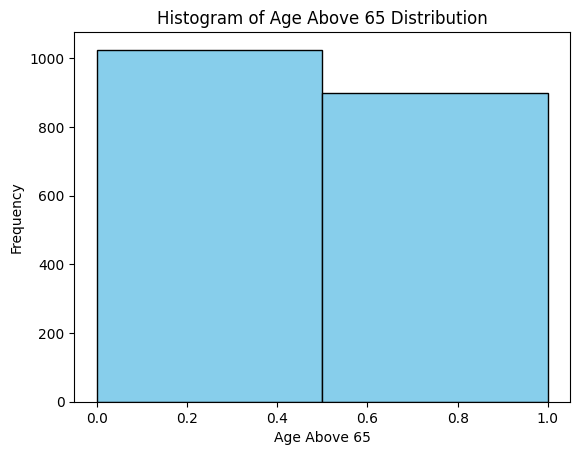

In [41]:
import matplotlib.pyplot as plt

plt.hist(patient_data['AGE_ABOVE65'], bins=2, color='skyblue', edgecolor='black')
plt.xlabel('Age Above 65')
plt.ylabel('Frequency')
plt.title('Histogram of Age Above 65 Distribution')
plt.show()

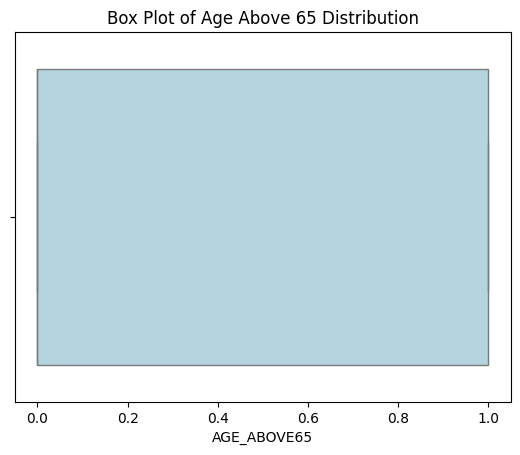

In [42]:
import seaborn as sns

sns.boxplot(x=patient_data['AGE_ABOVE65'], color='lightblue')
plt.title('Box Plot of Age Above 65 Distribution')
plt.show()

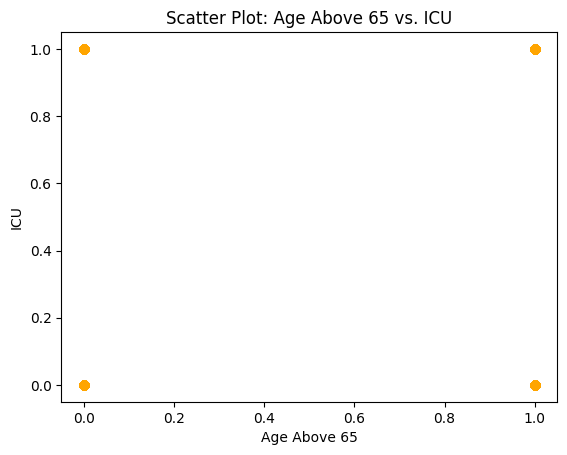

In [44]:
plt.scatter(patient_data['AGE_ABOVE65'], patient_data['ICU'], color='orange', alpha=0.5)
plt.xlabel('Age Above 65')
plt.ylabel('ICU')
plt.title('Scatter Plot: Age Above 65 vs. ICU')
plt.show()


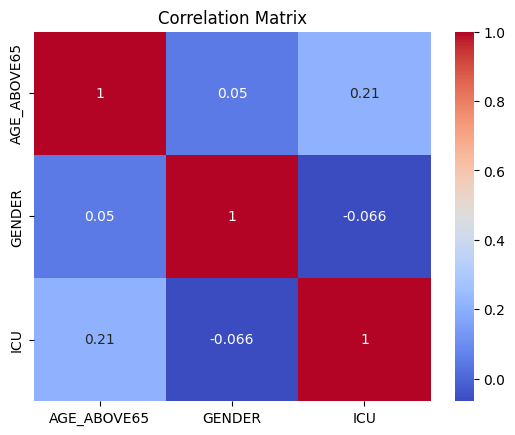

In [45]:
correlation_matrix = patient_data[['AGE_ABOVE65', 'GENDER', 'ICU']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
